# Introduction 

In the following notebook, I will be cleaning the weather_features.csv file located [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)

**Read in libraries for notebook**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Set notebook preferences**

In [43]:
#Set style for visualizations
plt.style.use('Solarize_Light2')

**Read in data**

In [44]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/01_Raw_Data/weather_features.csv',  dtype = {'weather_id': 'object'})

# Data Overview

**Data Dictionary**

* *dt_isodate*: time index localized to CET
* *city_name*: name of city
* *temp*: in k
* *temp_min*: minimum in k
* *temp_max*: maximum in k
* *pressure*: pressure in hPa
* *humidity*: humidity in %
* *wind_speed*: wind speed in m/s
* *wind_deg*: wind direction
* *rain_1h*: rain in last hour in mm
* *rain_3h*: rain last 3 hours in mm
* *snow_3h*: show last 3 hours in mm
* *clouds_all*: cloud cover in %
* *weather_id*: Code used to describe weather
* *weather_main*: Short description of current weather
* *weather_description*: Long description of current weather
* *weather_icon*: Weather icon code for website

**Data Preview**

In [45]:
#Print df shape
print('Shape of data:', df.shape)

#View head
df.head()

Shape of data: (178396, 17)


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


**Missing Values**

In [46]:
#Sum of missing values per column
df.isna().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

**Data Distributions**

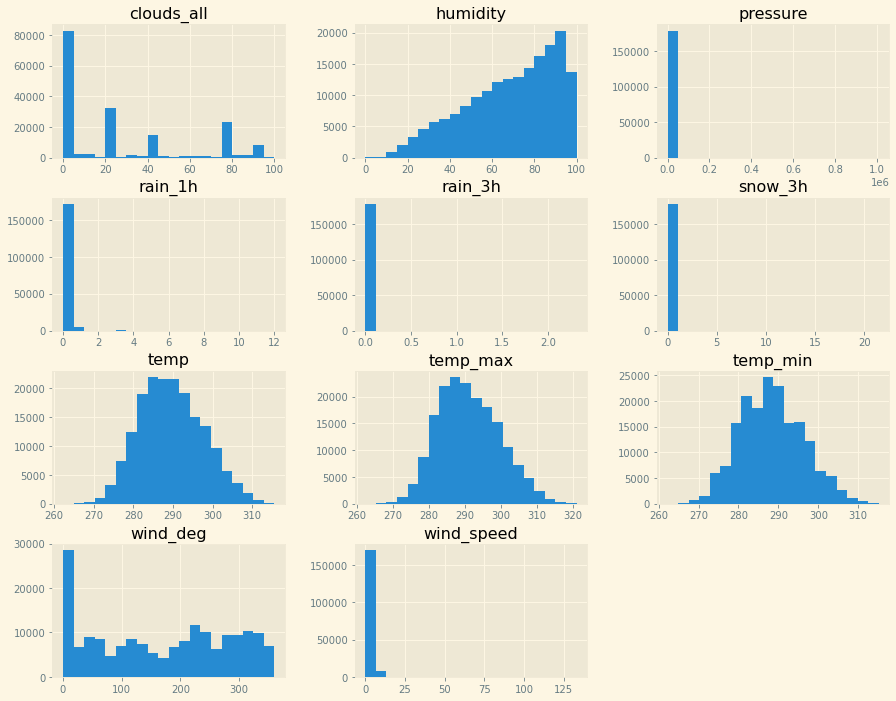

In [47]:
df.hist(figsize=(15,12), bins = 20);

# Data Cleaning

**Delete duplicates**

In [48]:
#Drop dupes
df.drop_duplicates(inplace=True)

**Drop unnecessary columns**

Only keeping information as it pertains to time, city, and recorded temperature

In [49]:
#weather_main captures in weather_id, weather_description, and weather_icon information
df = df[['dt_iso', 'city_name', 'temp']]

#Check
display(df.head(3))

,dt_iso,city_name,temp
0,2015-01-01 00:00:00+01:00,Valencia,270.475
1,2015-01-01 01:00:00+01:00,Valencia,270.475
2,2015-01-01 02:00:00+01:00,Valencia,269.686


**Clean and extract time data**

In [50]:
#Remove +01:00
df.dt_iso.replace('[+].*','', inplace=True,regex=True)

#Rename dt_iso to time and set type
df.rename(columns = {'dt_iso':'date_time'}, inplace = True)
df['date_time'] = pd.to_datetime(df['date_time'])

#Create columns extracting time, month, date, year data
df['date'] = df.date_time.dt.date
df['time'] = df.date_time.dt.time
df['weekday'] = df.date_time.dt.day_name()
df['month'] = df.date_time.dt.month_name()
df['year'] = df.date_time.dt.year

#Set date_time as index
df.set_index('date_time', inplace=True)

#Check
display(df.head(3))

,city_name,temp,date,time,weekday,month,year
date_time,,,,,,,
2015-01-01 00:00:00,Valencia,270.475,2015-01-01,00:00:00,Thursday,January,2015
2015-01-01 01:00:00,Valencia,270.475,2015-01-01,01:00:00,Thursday,January,2015
2015-01-01 02:00:00,Valencia,269.686,2015-01-01,02:00:00,Thursday,January,2015


**Remove phantom space in city_name**

In [51]:
#Remove phantom space
df.city_name = df.city_name.replace('^\s','', regex = True)

**Convert Temperature from Kelvin to Fahrenheit**

The conversion from Kelvin to Fahrenheit is:
    (K − 273.15) × 9/5 + 32

In [52]:
#Apply conversion formula to temperature columns
df['temp'] = df['temp'].apply(lambda x: ((x - 273.15) * (9/5)) + 32)

#Check
display(df.head())

,city_name,temp,date,time,weekday,month,year
date_time,,,,,,,
2015-01-01 00:00:00,Valencia,27.1850,2015-01-01,00:00:00,Thursday,January,2015
2015-01-01 01:00:00,Valencia,27.1850,2015-01-01,01:00:00,Thursday,January,2015
2015-01-01 02:00:00,Valencia,25.7648,2015-01-01,02:00:00,Thursday,January,2015
2015-01-01 03:00:00,Valencia,25.7648,2015-01-01,03:00:00,Thursday,January,2015
2015-01-01 04:00:00,Valencia,25.7648,2015-01-01,04:00:00,Thursday,January,2015


# Write file to CSV

In [53]:
#Print shape
print('Cleaned data shape:', df.shape)

#Write to CSV
df.to_csv(path + '/Data/02_Cleaned_Data/2020_0505_Cleaned_Weather_Features.csv')

Cleaned data shape: (178375, 7)
